In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [4]:
df = pd.read_csv("Train.csv")

In [5]:
df2 = pd.read_csv("Train_Vehicletravellingdata.csv")

In [6]:
df['V4'] = df2['V4'].values

In [7]:
df.head()

ID    V2     V5  V6  DrivingStyle  V4
0  DR_24526  1265  10243   2             2  81
1  DR_30052  1680  30871   6             2  88
2  DR_40928   936   3224   4             2  88
3  DR_66033  1503   3315   4             2  84
4  DR_45266   929   3022   4             2  89

In [8]:
# rearrange the columns
neworder = ["ID","V2","V4","V5","V6", "DrivingStyle"]
df=df.reindex(columns=neworder)

In [9]:
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name,df[column_name].unique()))


Unique values in column ID are: ['DR_24526' 'DR_30052' 'DR_40928' ... 'DR_61590' 'DR_69505' 'DR_56117']
Unique values in column V2 are: [1265 1680  936 ...  814 1181 1551]
Unique values in column V4 are: [ 81  88  84  89  91  92  90  85  87 102  79  82  86  83  71  78 101  77
  76  74  68  80  98  93  99  97  96 103  73 105 106 100  75  72  55 109
  61  94  95 107 126 117 124  70  65  57 110  66 111 121 120 112  69 114
 116 108 104  53 147 125 115  64  67  62  63  60  58 131 113 135  44 123
  54 128  56 119  59  32 122 127  52  41  42  43  51  40  48  49  39  50
  47  37  46  45  17 118  20  36  27]
Unique values in column V5 are: [10243 30871  3224 ...  3245 31864 27812]
Unique values in column V6 are: [2 6 4 3 5 7 8 9]
Unique values in column DrivingStyle are: [2 1 3]


### Capstone 3:  Unsupervised Machine Learning

Dataset: Aggressive Driving
From: Kaggle
Dimension:6 X 12,994

### Overview

#### 1. Data Exploratory
#### 2. Data Cleaning
#### 3. Feature Engineering
#### 4. Clustering
####        - K-means
####        - Hierarchical 
####        - DB-SCAN
####        - Gaussian Mixture Models (GMM)
#### 5. Performance
#### Conclusion


In [10]:
df.head()


ID    V2  V4     V5  V6  DrivingStyle
0  DR_24526  1265  81  10243   2             2
1  DR_30052  1680  88  30871   6             2
2  DR_40928   936  88   3224   4             2
3  DR_66033  1503  84   3315   4             2
4  DR_45266   929  89   3022   4             2

In [11]:
df.tail()


ID    V2  V4     V5  V6  DrivingStyle
12989  DR_61322   730  78   3245   2             2
12990  DR_35712   573  83   2135   2             3
12991  DR_61590  1747  85  31864   6             1
12992  DR_69505   710  83   3244   2             2
12993  DR_56117  2001  82  27812   6             1

In [12]:
df.describe()


V2            V4            V5            V6  DrivingStyle
count  12994.000000  12994.000000  12994.000000  12994.000000  12994.000000
mean    1029.985994     81.479221   8131.074188      3.282746      2.078806
std      564.456119     10.225770   8998.561344      1.655675      0.706824
min      155.000000     17.000000     44.000000      2.000000      1.000000
25%      561.000000     76.000000   1738.000000      2.000000      2.000000
50%      637.000000     82.000000   2408.000000      2.000000      2.000000
75%     1695.000000     87.000000  14506.750000      5.000000      3.000000
max     2337.000000    147.000000  57230.000000      9.000000      3.000000

In [13]:
df.dtypes


ID              object
V2               int64
V4               int64
V5               int64
V6               int64
DrivingStyle     int64
dtype: object

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 6 columns):
ID              12994 non-null object
V2              12994 non-null int64
V4              12994 non-null int64
V5              12994 non-null int64
V6              12994 non-null int64
DrivingStyle    12994 non-null int64
dtypes: int64(5), object(1)
memory usage: 558.4+ KB


In [15]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)


Total  Percent
DrivingStyle      0      0.0
V6                0      0.0
V5                0      0.0
V4                0      0.0
V2                0      0.0
ID                0      0.0

Find outliers in the features

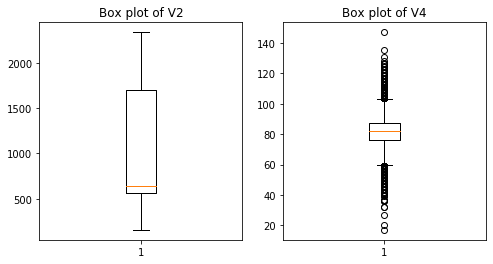

In [16]:
# For Outliers (box plot):
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
plt.boxplot(df["V2"])
plt.title("Box plot of V2")

plt.subplot(1,2,2)
plt.boxplot(df["V4"])
plt.title("Box plot of V4")
plt.savefig("img/BoxPlot_1.png", bbox_inches='tight', pad_inches=2)
plt.show()

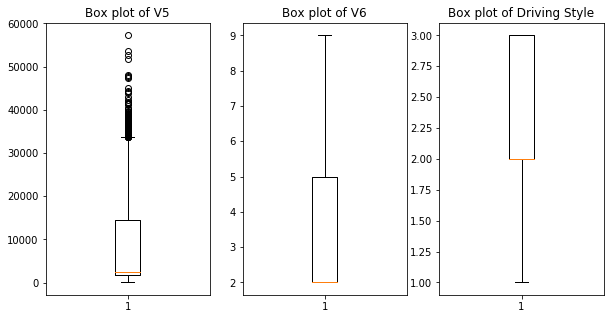

In [17]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
plt.boxplot(df["V5"])
plt.title("Box plot of V5")

plt.subplot(1,3,2)
plt.boxplot(df["V6"])
plt.title("Box plot of V6")

plt.subplot(1,3,3)
plt.boxplot(df["DrivingStyle"])
plt.title("Box plot of Driving Style")
plt.savefig("img/BoxPlot_2.png", bbox_inches='tight', pad_inches=2)
plt.show()

V4 and V5 to be winsorized

In [18]:
from scipy.stats.mstats import winsorize
# We apply  winsorization to the lowest / highest end 
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 10th / 90th percentile.
df["winsorized_V4"] = winsorize(df["V4"], (0.10, 0.10))
df["winsorized_V5"] = winsorize(df["V5"], (0.0, 0.10))


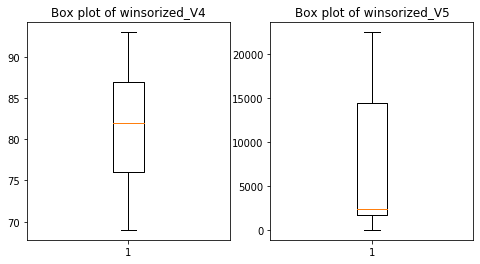

In [19]:
# Replot to verify
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
plt.boxplot(df["winsorized_V4"])
plt.title("Box plot of winsorized_V4")

plt.subplot(1,2,2)
plt.boxplot(df["winsorized_V5"])
plt.title("Box plot of winsorized_V5")
plt.savefig("img/Winsorized_BoxPlot_1.png", bbox_inches='tight', pad_inches=2)
plt.show()

In [20]:
# rearrange the columns with winsorized values
neworder = ["ID","V2","winsorized_V4","winsorized_V5","V6", "DrivingStyle"]
df=df.reindex(columns=neworder)


In [21]:
df.describe()


V2  winsorized_V4  winsorized_V5            V6  DrivingStyle
count  12994.000000   12994.000000   12994.000000  12994.000000  12994.000000
mean    1029.985994      81.598276    7646.798368      3.282746      2.078806
std      564.456119       7.385885    7910.467594      1.655675      0.706824
min      155.000000      69.000000      44.000000      2.000000      1.000000
25%      561.000000      76.000000    1738.000000      2.000000      2.000000
50%      637.000000      82.000000    2408.000000      2.000000      2.000000
75%     1695.000000      87.000000   14506.750000      5.000000      3.000000
max     2337.000000      93.000000   22488.000000      9.000000      3.000000

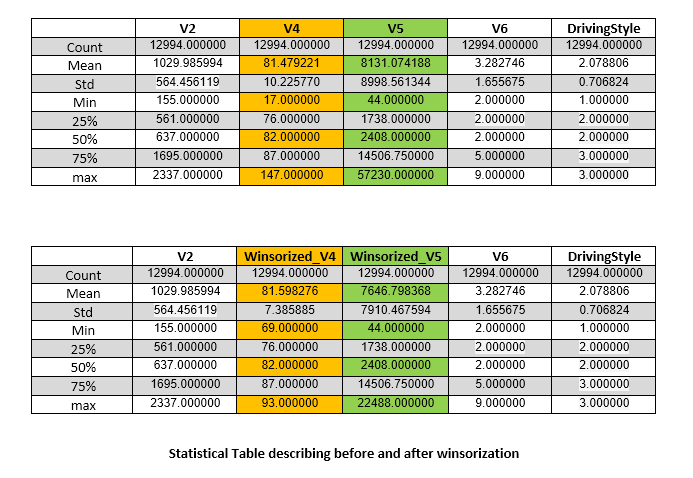

In [22]:
# Select Features
X = df.iloc[:,1:5]
y = df.iloc[:,-1]


In [23]:
# Make sure the number of rows divides evenly into four samples.
rows = df.shape[0] - df.shape[0] % 2
df = df.iloc[:rows, :]

In [24]:
# Break into a set of features and a variable for the known outcome.
X = df.iloc[:,1:5]
y = df.iloc[:,-1]


In [25]:
# Normalize
X_std = StandardScaler().fit_transform(X)

In [26]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

In [27]:
# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [28]:
X_std.shape

(12994, 4)

In [29]:
X_pca.shape

(12994, 2)

In [30]:
y.shape

(12994,)

In [31]:
# what is X_pca dimension
type(X_pca)

numpy.ndarray

In [77]:
len(X_pca[0]) 

2

In [122]:
y.unique()

array([2, 1, 3], dtype=int64)

In [125]:
colors=["#0000FF", "#00FF00", "#FF0066"]

In [78]:
X_pca[2][1]

-0.8644474437685669

In [79]:
len(X_pca[:][0])

2

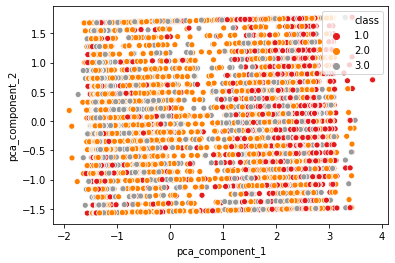

In [92]:
my_pca = pd.DataFrame(np.c_[X_pca[:,0], X_pca[:,1], y], columns=['pca_component_1','pca_component_2','class'])
ax = sns.scatterplot(x="pca_component_1", y="pca_component_2", hue="class",
                     sizes=(40, 200),palette="Set1",
                     legend="full",data=my_pca)

In [41]:
# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=123)

In [42]:
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

In [ ]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
      # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]![ClusterPlot.png](attachment:ClusterPlot.png)
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
        axarr[i].set_xlim()
        axarr[i].set_ylim()
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.savefig("img/ClusterPlot.png", bbox_inches='tight', pad_inches=2)
    plt.show()

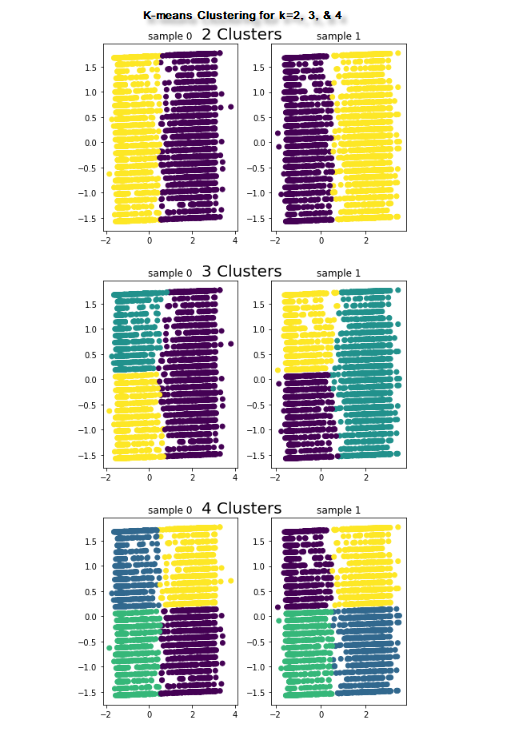

The three clusters solution seems to be the only consistent solution among all.

In [114]:
# how to check accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred, normalize=True)


In [115]:
accuracy


0.33146067415730335

Next, apply k-means on the whole dataset by setting k is equal two, three and four and get ARI score for each of them.

Note on ARI and Silhouette Coefficient:

ARI score can range between 0 to 1. It measures how similar an object is to its own cluster. A high ARI means a higher agreement between 2 points. 
Silhouette Coefficient can range between -1 to 1. A high value indicates objects well matched to its own cluster and poorly matched to neigboring cluster.

In [113]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_2)))
print("ARI for three cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_3)))
print("ARI for four cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_4)))


ARI for two cluster k-means: 0.08164621702764663
ARI for three cluster k-means: 0.03993290809950898
ARI for four cluster k-means: 0.04875626280350998


According to the results, the best solution is the two cluster solution as its ARI score is the highest.

Next, apply k-means on the whole dataset by setting k is equal two, three and four and get silhouette coefficient for each of them.

In [102]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

print("Silhouette score for two cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_2, metric='euclidean', sample_size =5000)))
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_3, metric='euclidean', sample_size =5000)))
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_4, metric='euclidean', sample_size =5000)))


Silhouette score for two cluster k-means: 0.6036426278593523
Silhouette score for three cluster k-means: 0.4937298727271684
Silhouette score for four cluster k-means: 0.4398960688120953


According to the results, the best solution is the two cluster solution as its silhouette score is the highest.
Note: sample size reduced to 5000 to avoid memory error. 

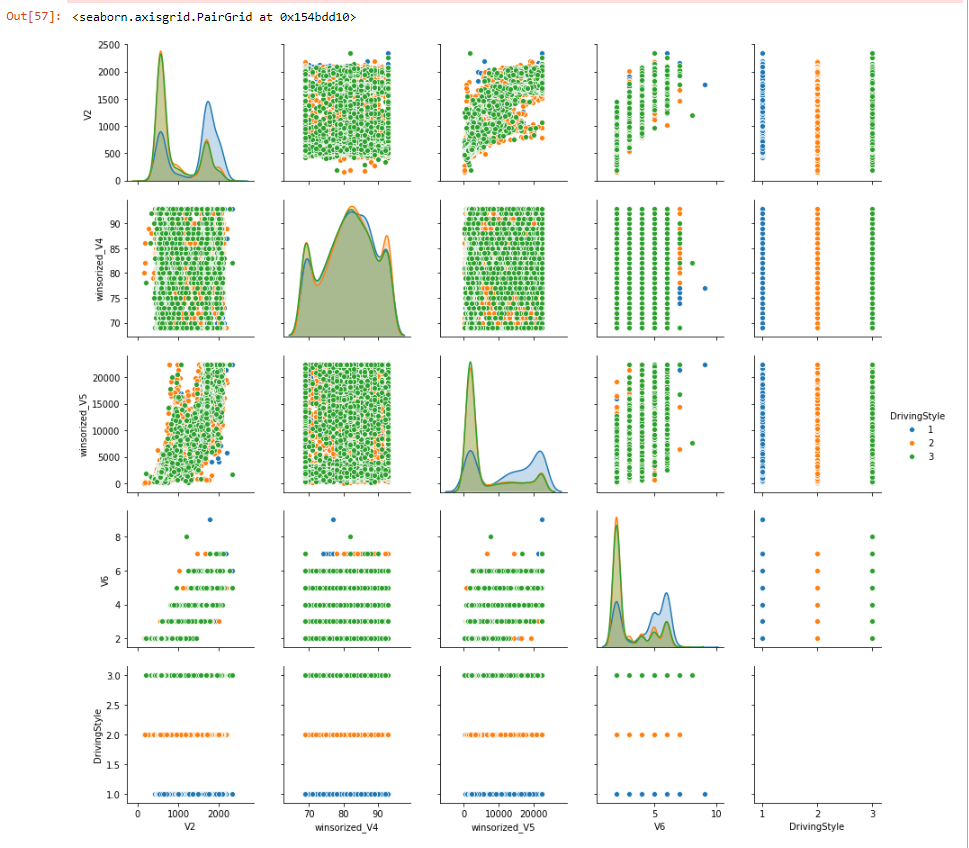

c:\python\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


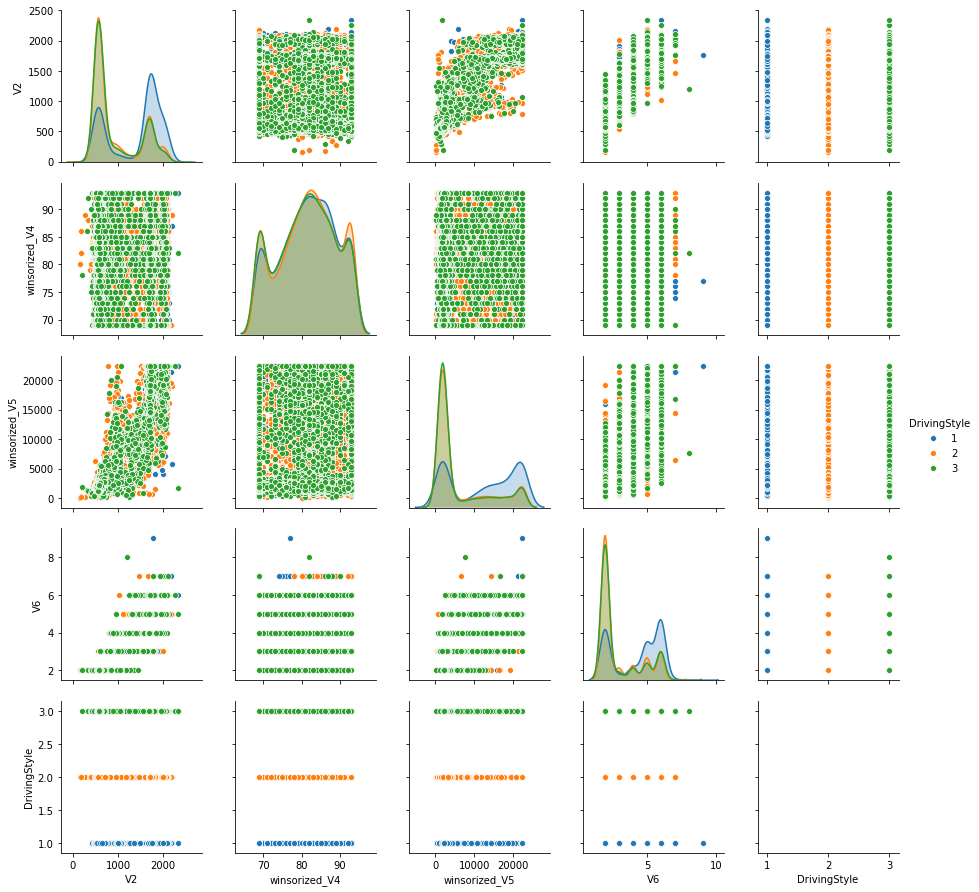

In [57]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df, hue = "DrivingStyle")


In [60]:
# Break into a set of features and a variable for the known outcome.
X = df.iloc[:,1:5]
y = df.iloc[:,-1]

In [61]:
# Normalize
X_std = StandardScaler().fit_transform(X)


In [62]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

In [93]:
X_std

array([[ 0.41637081, -0.08100575,  0.32821088, -0.77478682],
       [ 1.15162011,  0.86678445,  1.8762194 ,  1.64123908],
       [-0.16651358,  0.86678445, -0.55912859,  0.43322613],
       ...,
       [ 1.27032301,  0.46058865,  1.8762194 ,  1.64123908],
       [-0.56691441,  0.18979145, -0.55660019, -0.77478682],
       [ 1.72033102,  0.05439285,  1.8762194 ,  1.64123908]])

In [61]:
scaler = StandardScaler()
all_data = scaler.fit_transform(X)


109 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


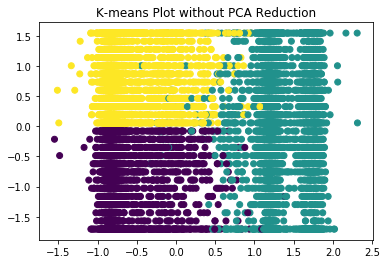

In [63]:
k_means = KMeans(n_clusters=3, random_state=123)
%timeit k_means.fit(all_data)
y_pred = k_means.predict(all_data)

# Plot the solution.
plt.scatter(all_data[:,0], all_data[:,1], c=y_pred)
plt.title("K-means Plot without PCA Reduction")
plt.show()


In [111]:
# how to check accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df.iloc[:,-1], y_pred, normalize=True)


In [112]:
accuracy


0.33146067415730335

In [47]:
# Repeat the K-means clustering without the PCA reduction

pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X)

print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_2)))
print("ARI for three cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_3)))
print("ARI for four cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_4)))


ARI for two cluster k-means: 0.07920571496992569
ARI for three cluster k-means: 0.08322457211910073
ARI for four cluster k-means: 0.0832547727790402


In [58]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

print("Silhouette score for two cluster k-means: {}".format(
    metrics.silhouette_score(X, pred_2, metric='euclidean', sample_size =5000)))
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(X, pred_3, metric='euclidean', sample_size =5000)))
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(X, pred_4, metric='euclidean', sample_size =5000)))

Silhouette score for two cluster k-means: 0.772451570715335
Silhouette score for three cluster k-means: 0.19734469205925692
Silhouette score for four cluster k-means: -0.02515970997536654


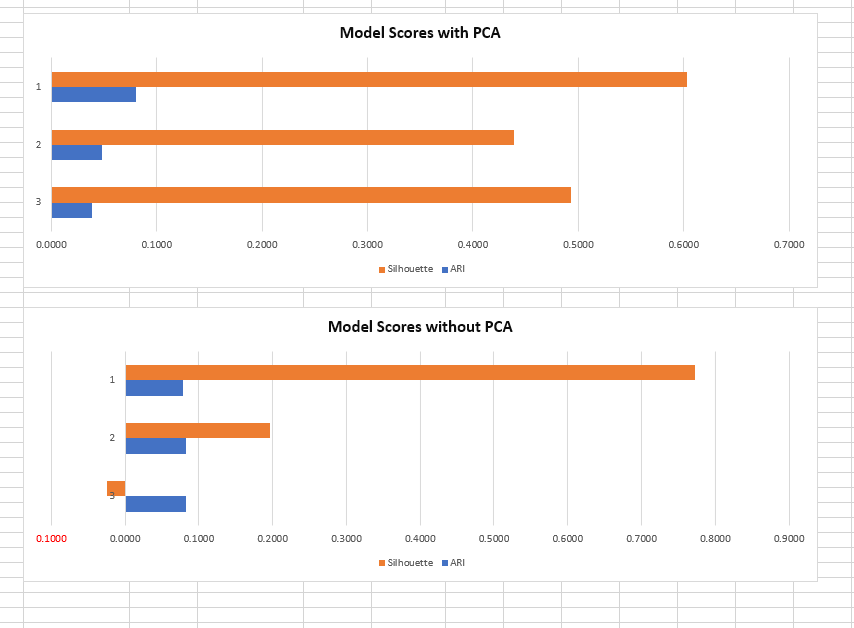

Next, plot dendrograms for the dataset using three different linkage methods: complete, average and ward. 

Linkage methods

    Ward: The Ward method tends to look for spherical clusters such that the clusters are cohesive inside and differentiated from other groups. In general, this method tends to find clusters of similar size. Note that the Ward method only works with Euclidean distance.
    Complete: The Complete method links clusters using their furthest observations, that is, their most dissimilar data points. Consequently, clusters created using this method tend to be comprised of highly similar observations, making the resulting groups quite compact.
    Average: The Average method links clusters using their centroids. Since this method focuses on centroids and ignoring the boundary points, it tends to create larger groups than the complete method. Moreover, the clusters can be different sizes and shapes in contrast to the Ward method.



In [49]:
# reduce the X_std size to avoid memory error
X1_std = X_std[1:5000,:]


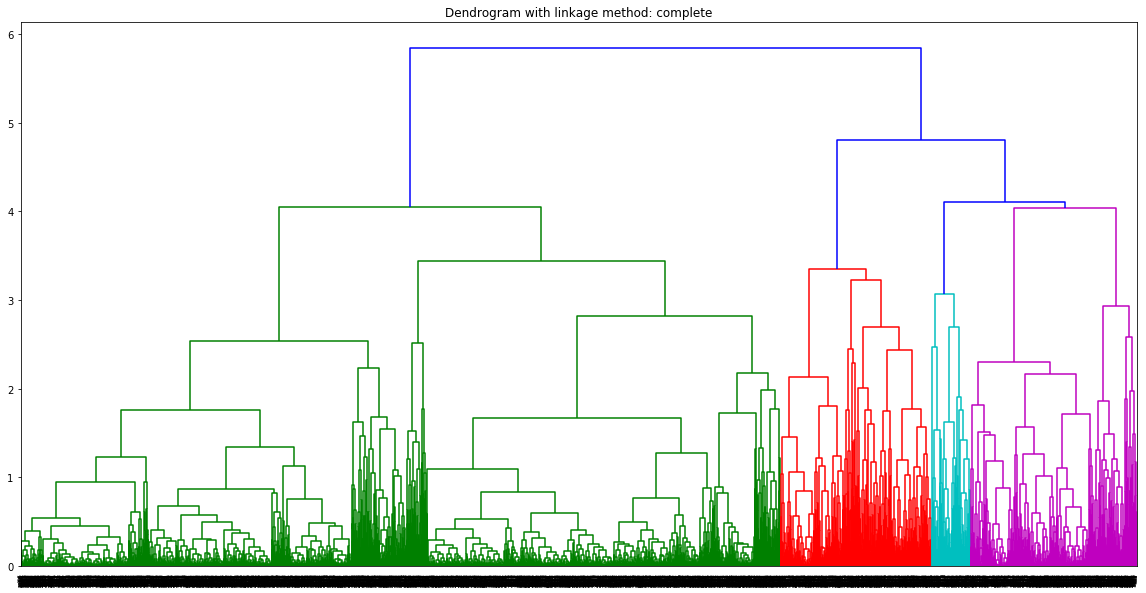

In [53]:
# Complete
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X1_std, method='complete'))
plt.savefig("img/Dendrogram with linkage method complete.png", bbox_inches='tight', pad_inches=2)
plt.show()



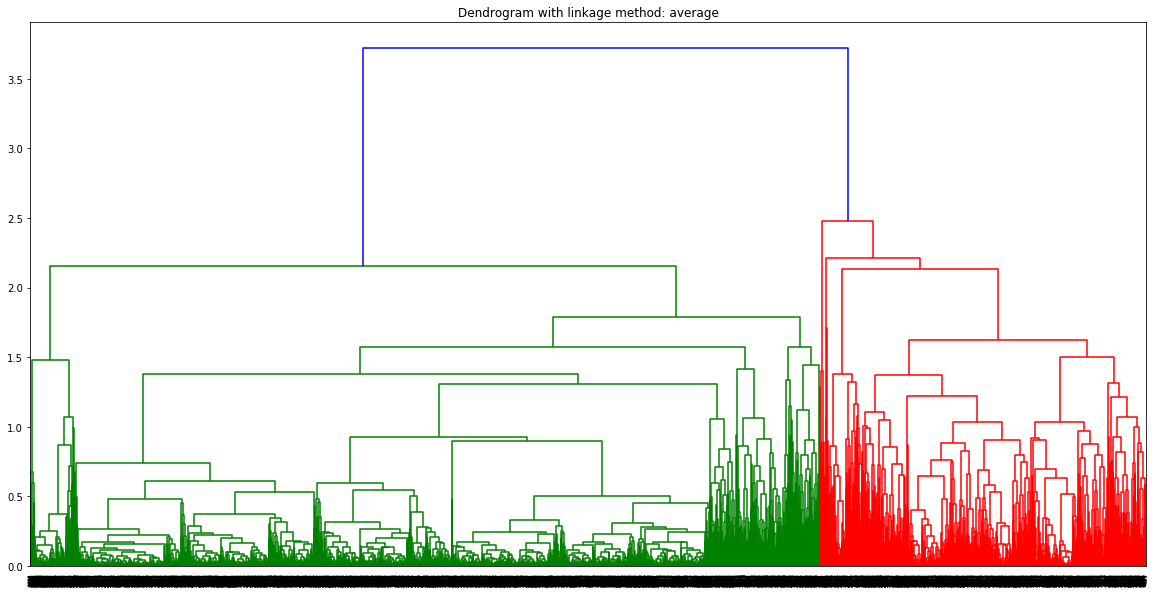

In [50]:
# Average
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X1_std, method='average'))
plt.savefig("img/Dendrogram with linkage method average.png", bbox_inches='tight', pad_inches=2)
plt.show()


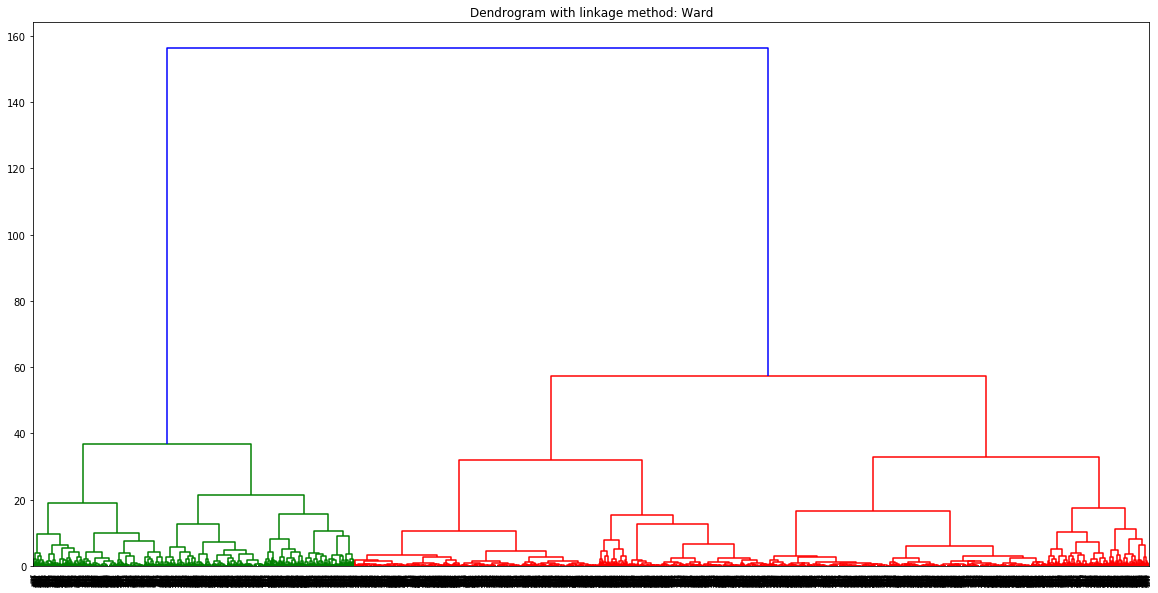

In [51]:
# Ward
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: Ward")
dendrogram(linkage(X1_std, method='ward'))
plt.savefig("img/Dendrogram with linkage method Ward.png", bbox_inches='tight', pad_inches=2)
plt.show()


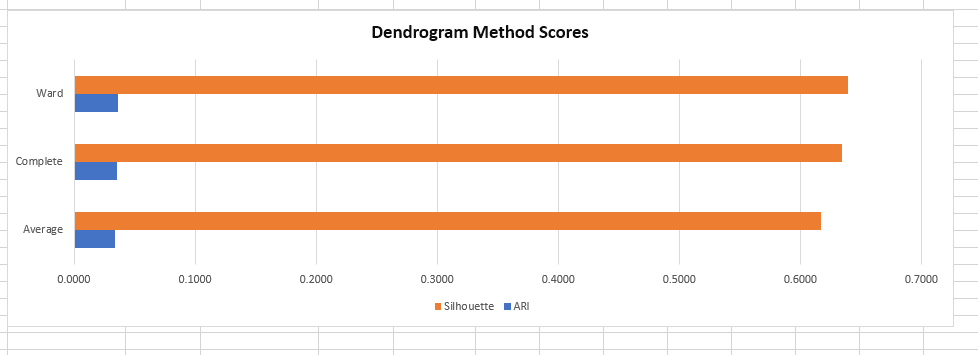

The more reasonable result is that of the ward method's. The complete and average methods produced results that are hard to reconcile with the facts as their two cluster solutions has too few observations for one of the clusters.

Let's calculate the ARI and silhouette scores for each of the  solutions above


In [113]:
# match X1_std with y
y = df.iloc[:4999,-1]


In [114]:
y.shape

(4999,)

In [111]:
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X1_std, clusters, metric='euclidean',sample_size= 1000)))


The silhoutte score of the Agglomerative Clustering solution: 0.6091366704992295


In [116]:
linkage_methods = ["ward", "average", "complete"]

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X1_std)

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X1_std, clusters, metric='euclidean', sample_size = 1000)))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X1_std)

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X1_std, clusters, metric='euclidean', sample_size = 1000)))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X1_std)

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X1_std, clusters, metric='euclidean', sample_size = 1000)))


ARI score of linkage method average: 0.034543770518695976
Silhouette score of linkage method average: 0.617557893464708
------------------------------------------------
ARI score of linkage method complete: 0.03535613087320993
Silhouette score of linkage method complete: 0.6349376866490675
------------------------------------------------
ARI score of linkage method ward: 0.036505325030704805
Silhouette score of linkage method ward: 0.6394390259943726


According to the results, the best scores are achieved by the linkage methode ward. The ARI and silhouette scores of the two cluster k-means solution was 0.44 and 0.17 respectively. So, in terms of ARI the best model seems to be k-means, however in terms of silhouette score the best one is agglomerative clustering.

Next, apply DBSCAN to the dataset with different values for epsilon and minimum samples parameter

In [73]:
# Select Features
X = df.iloc[:,1:5]
y = df.iloc[:,-1]


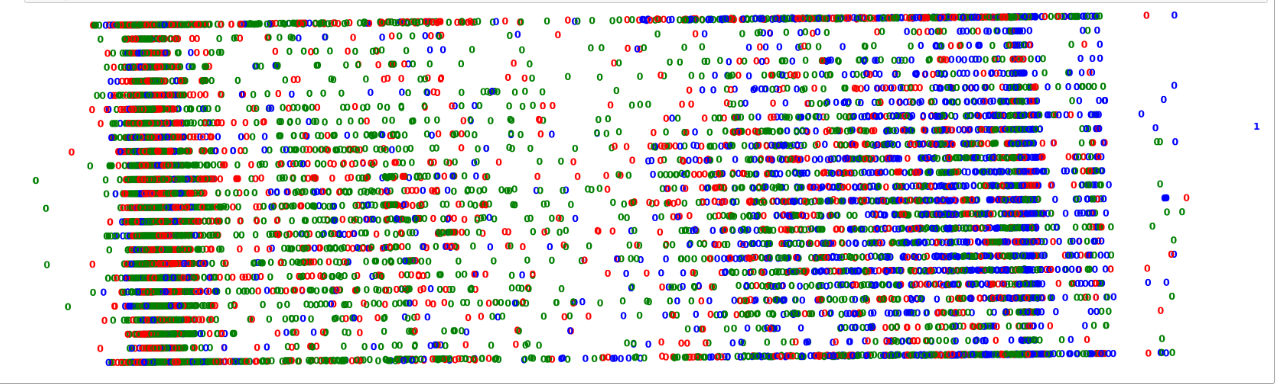

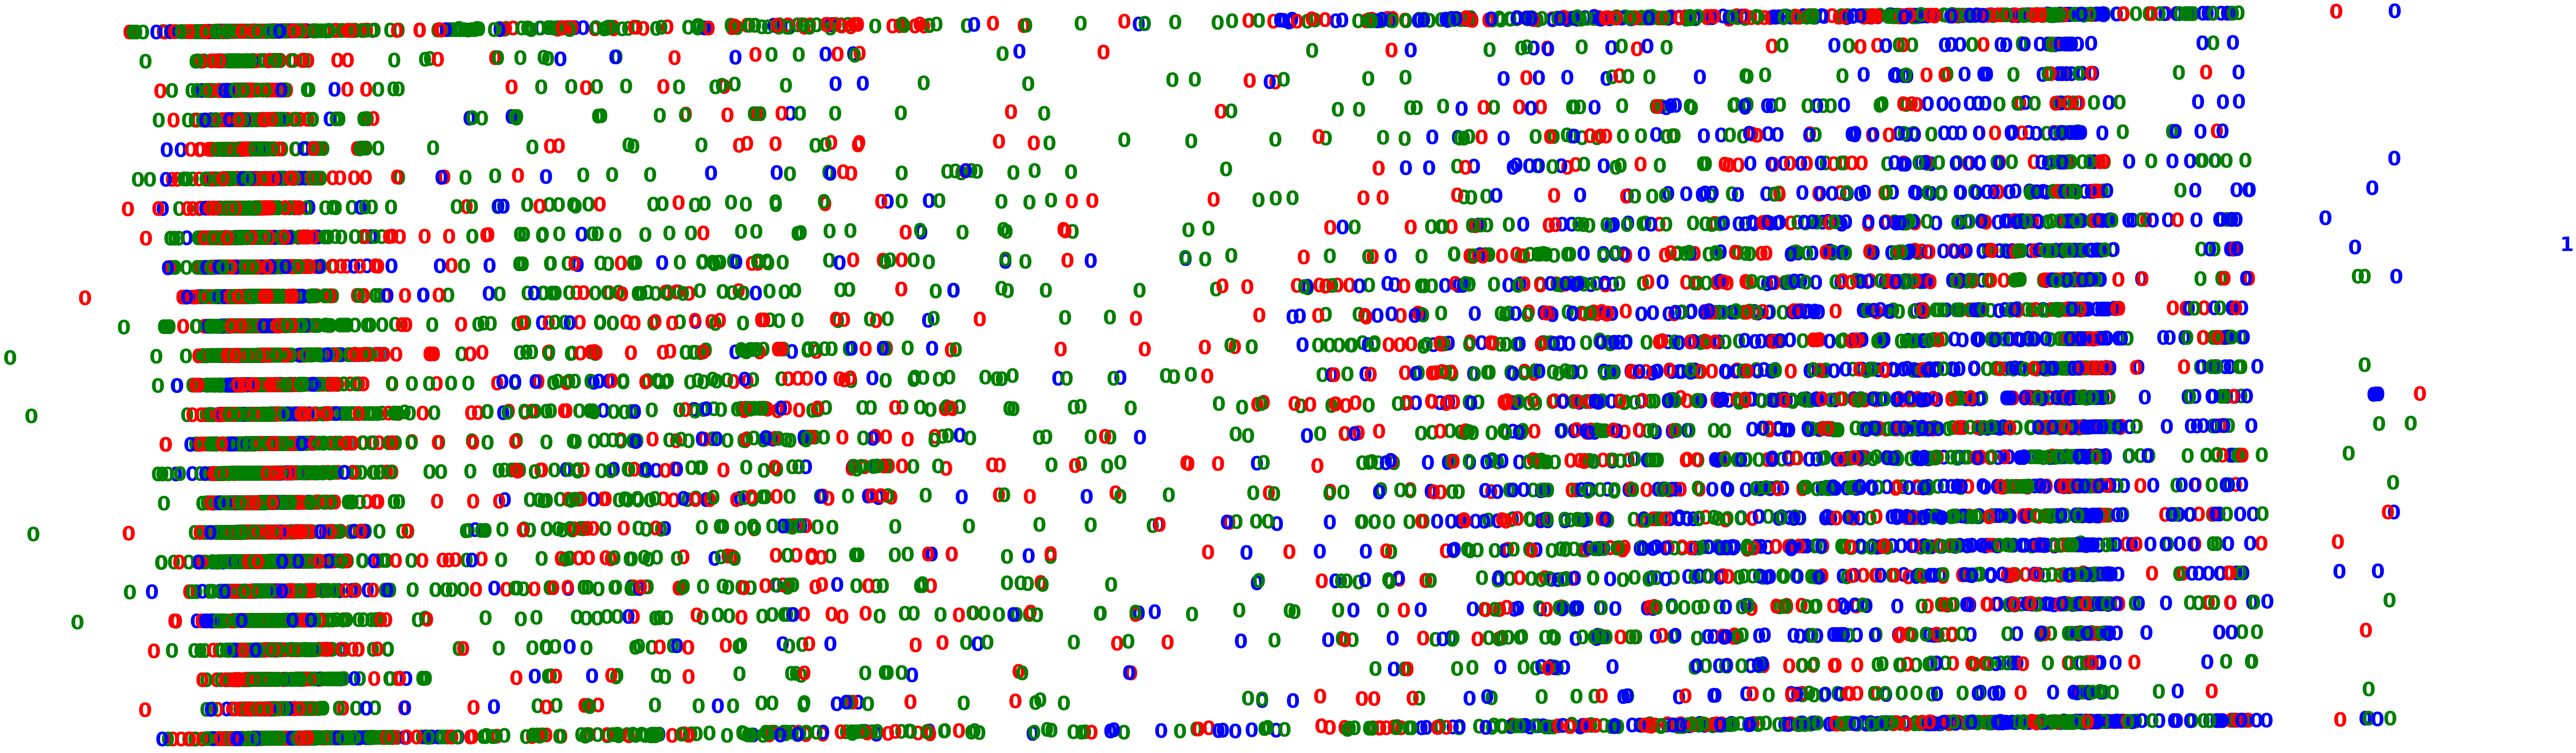

In [64]:
# Standardize the data.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(20,10))
colours = 'rbgrg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig("img/DBSCAN.png", bbox_inches='tight', pad_inches=2)
plt.show()


### It appears that it not easy to  get a two cluster solution using DBSCAN


Next, apply DBSCAN with epsilon = 1, minimum sample = 1 thru 50 and metric = euclidean


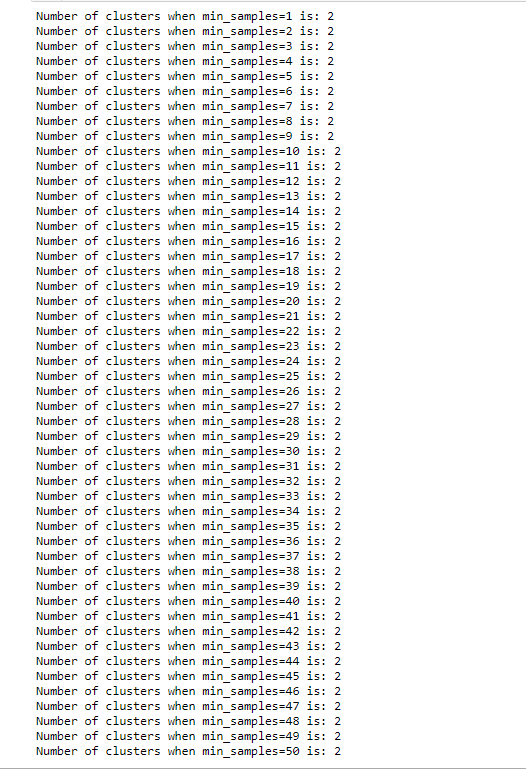

In [123]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in range(2,51):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))
    

Number of clusters when min_samples=1 is: 2
Number of clusters when min_samples=2 is: 2
Number of clusters when min_samples=3 is: 2
Number of clusters when min_samples=4 is: 2
Number of clusters when min_samples=5 is: 2
Number of clusters when min_samples=6 is: 2
Number of clusters when min_samples=7 is: 2
Number of clusters when min_samples=8 is: 2
Number of clusters when min_samples=9 is: 2
Number of clusters when min_samples=10 is: 2
Number of clusters when min_samples=11 is: 2
Number of clusters when min_samples=12 is: 2
Number of clusters when min_samples=13 is: 2
Number of clusters when min_samples=14 is: 2
Number of clusters when min_samples=15 is: 2
Number of clusters when min_samples=16 is: 2
Number of clusters when min_samples=17 is: 2
Number of clusters when min_samples=18 is: 2
Number of clusters when min_samples=19 is: 2
Number of clusters when min_samples=20 is: 2
Number of clusters when min_samples=21 is: 2
Number of clusters when min_samples=22 is: 2
Number of clusters 

### Now, we keep the minimum sample to 1 and increase the epsilon value from 1 to 10:


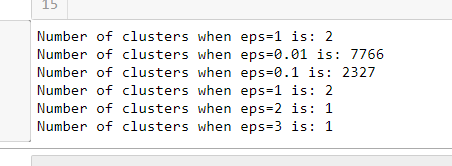

In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when eps=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in [0.01,0.1,1,2,3,4,5,6,7,8,9,10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))
    

Number of clusters when eps=1 is: 2
Number of clusters when eps=0.01 is: 7766
Number of clusters when eps=0.1 is: 2327
Number of clusters when eps=1 is: 2
Number of clusters when eps=2 is: 1
Number of clusters when eps=3 is: 1


### The number of clusters decreases as the epsilon value increases.


Next, we will use the Gaussian Mixture Models (GMM) clustering to the dataset by setting n_components=2. Get ARI and silhoutte scores for this solution and compare it with those of the k-means and hierarchical clustering solutions and determine which algorithm perform better.

In [110]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [111]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)


In [113]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean', sample_size = 1000)))


ARI score: 0.045517527399692954
Silhouette score: 0.49129694978118743


### Note: Sample saize reduce to 1000 to avoid the memory error.
### GMM scores lower than both k-means and hierarchical clustering in terms of ARI and silhouette scores.


### Use different covariance type (full, tied, diag & spherical) parameter in GMM to determine the best ARI and Silhouette scores.


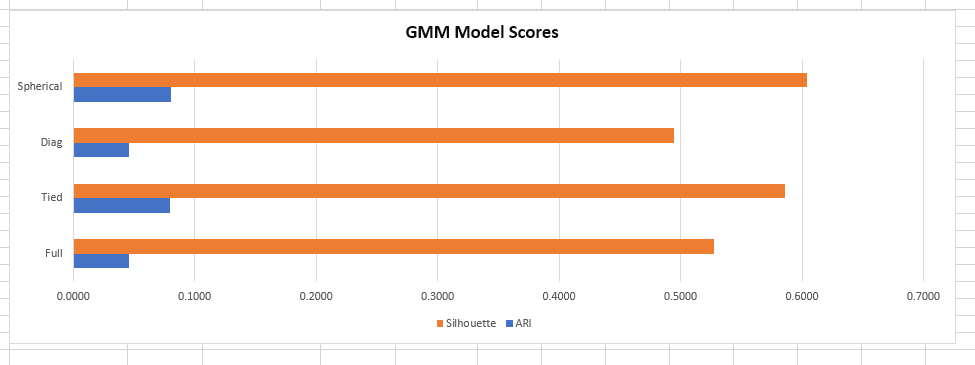

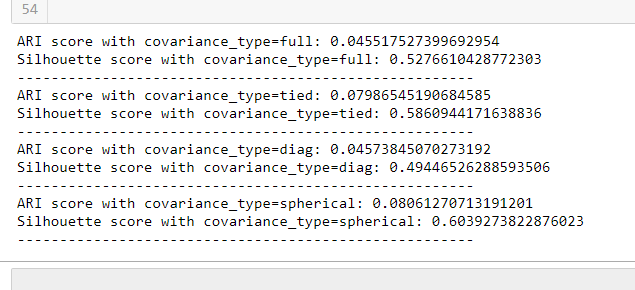

In [115]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=full: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean', sample_size = 1000)))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="tied")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=tied: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean', sample_size = 1000)))
print("------------------------------------------------------")

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="diag")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=diag: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean', sample_size = 1000)))
print("------------------------------------------------------")


# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type="spherical")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score with covariance_type=spherical: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean', sample_size = 1000)))
print("------------------------------------------------------")



ARI score with covariance_type=full: 0.045517527399692954
Silhouette score with covariance_type=full: 0.5276610428772303
------------------------------------------------------
ARI score with covariance_type=tied: 0.07986545190684585
Silhouette score with covariance_type=tied: 0.5860944171638836
------------------------------------------------------
ARI score with covariance_type=diag: 0.04573845070273192
Silhouette score with covariance_type=diag: 0.49446526288593506
------------------------------------------------------
ARI score with covariance_type=spherical: 0.08061270713191201
Silhouette score with covariance_type=spherical: 0.6039273822876023
------------------------------------------------------


### ARI and silhouette scores of covariance type spherical is higher than the others. The scores of the covariance type tied is the second highest and scores of the covariance type diag are the lowest.

### Note: Sample size reduced to 1000 to avoid memory error.


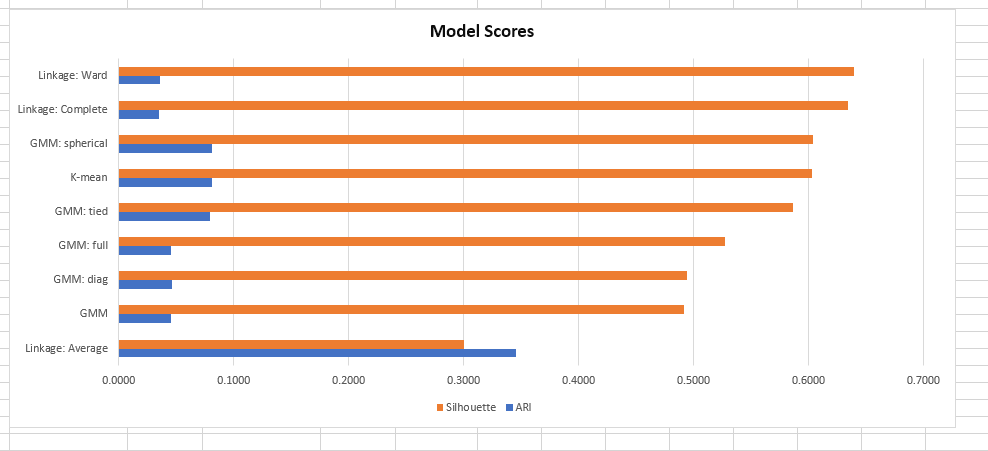

### Conclusion

For my project, the Euclidean distance-based algorithm performed better than density based clustering algorithm such as DBSCAN. The ARI & Silhouette scores for linkage methods Ward & Complete were top performers. I did have some issues with the run-time where my laptop throws memory error if the sample size very large. This drawback may have limited me to fully test out the capability of DBSCAN & GMM capabilities.